In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df = df.dropna()
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])


In [3]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_clf = LogisticRegression()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
knn_clf = KNeighborsClassifier()

voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('rf', rf_clf),
    ('knn', knn_clf)
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

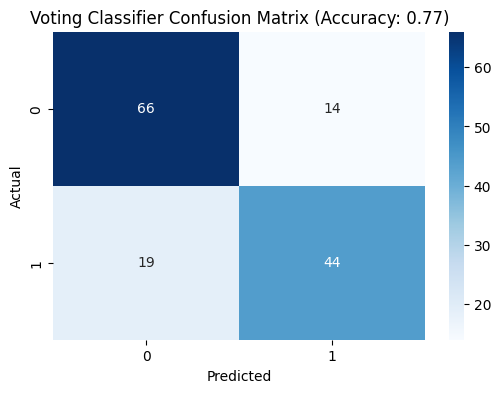

In [4]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Voting Classifier Confusion Matrix (Accuracy: {acc:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()